# Preparing LDA motifs for aggregated CD data

I initially ran this using a now extinct "scimap" anaconda environment. I've since switched to miniconda, and this version of scimap can not read the h5ad (the format is too new).
For the purpose of plotting, I'll load need to resave everything...

In [1]:
import scimap as sm
import os
import re
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pk
import tqdm
from joblib import Parallel, delayed

/home/smithd30/miniconda3/envs/scimap/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [5]:
adata = sc.read_loom('all_regions_dat.loom')
varnames = pd.read_csv("var_names.csv")
with open("uns_dat.pk", "rb") as f:
    unsdat = pk.load(f)
adata.var_names = varnames.iloc[:,0]
adata.uns = unsdat
adata

/home/smithd30/miniconda3/envs/scimap/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning:

Transforming to str index.

/home/smithd30/miniconda3/envs/scimap/lib/python3.8/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning:

Transforming to str index.



AnnData object with n_obs × n_vars = 3895114 × 38
    obs: 'Absolute.X', 'Absolute.Y', 'Cell.Size', 'In.Tile.X', 'In.Tile.Y', 'Reg', 'Tile.Col', 'Tile.Row', 'Tile.Z', 'Unnamed: 0', 'cell_type_pred_knn', 'cell_type_pred_knn_prob', 'index_info', 'motif', 'nCount_originalexp', 'nCount_raw', 'nFeature_originalexp', 'nFeature_raw', 'n_genes_by_counts', 'new_pheno', 'obs_names', 'orig.ident', 'region', 'total_counts'
    var: 'var_names'
    uns: 'lda_10', 'lda_10_probability', 'lda_12', 'lda_12_probability', 'lda_15', 'lda_15_probability', 'lda_8', 'lda_8_probability', 'spatial_lda', 'spatial_lda_probability'

In [3]:
adata.obs['case'] = adata.obs['region'].apply(lambda x: x.split("_")[0])

In [3]:
adata = sm.tl.spatial_lda(adata, num_motifs=12, radius=50, 
                          imageid='region', x_coordinate='Absolute.X', y_coordinate='Absolute.Y', 
                          phenotype='new_pheno',label="lda_12")
m = adata.uns['lda_12'].columns
motifs = adata.uns['lda_12'].apply(lambda x: m[np.argmax(x)], axis=1)
adata.obs['motif'] = motifs

Processing: ['MCD1_reg1']
Identifying neighbours within 50 pixels of every cell
Processing: ['MCD3_reg2']
Identifying neighbours within 50 pixels of every cell
Processing: ['MCD1_reg3']
Identifying neighbours within 50 pixels of every cell
Processing: ['HVCD2_reg1']
Identifying neighbours within 50 pixels of every cell
Processing: ['R1_reg3']
Identifying neighbours within 50 pixels of every cell
Processing: ['MCD4_reg3']
Identifying neighbours within 50 pixels of every cell
Processing: ['R2_reg1']
Identifying neighbours within 50 pixels of every cell
Processing: ['HVCD1_reg3']
Identifying neighbours within 50 pixels of every cell
Processing: ['HVCD2_reg3']
Identifying neighbours within 50 pixels of every cell
Processing: ['MCD3_reg1']
Identifying neighbours within 50 pixels of every cell
Processing: ['HVCD1_reg1']
Identifying neighbours within 50 pixels of every cell
Processing: ['MCD4_reg1']
Identifying neighbours within 50 pixels of every cell
Processing: ['MCD4_reg2']
Identifying ne

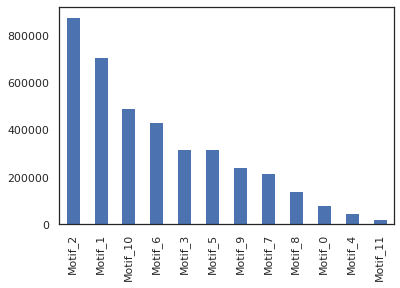

In [7]:
adata.obs.motif.value_countws().plot.bar()
plt.savefig('outs/LDA_voronoi_test/motif_abundance_12.png', bbox_inches="tight")

/mnt/isilon/cscb/software/anaconda3/envs/scimap/lib/python3.8/site-packages/scimap/plotting/_voronoi.py:228: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



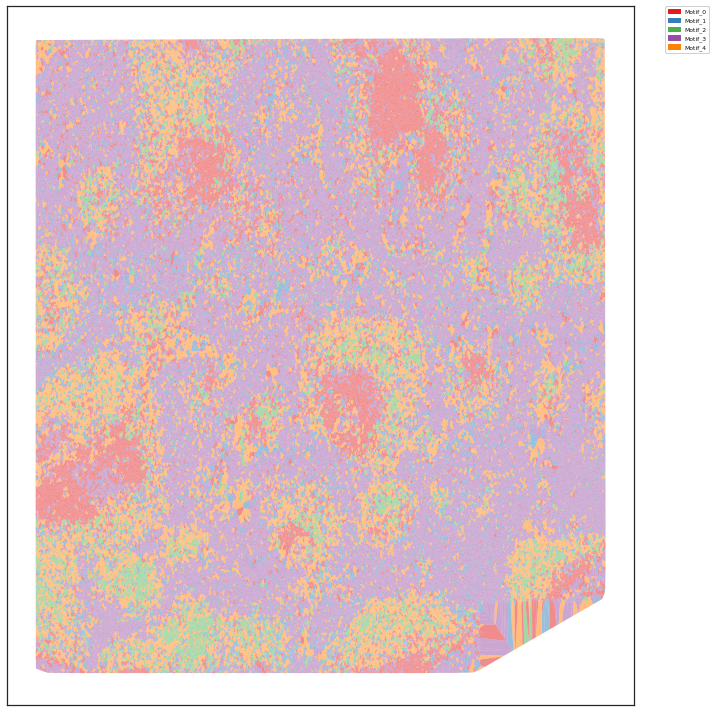

In [4]:
r = "MCD4_reg4"
fig, ax = plt.subplots(figsize=(10,10))
sm.pl.voronoi(adata[adata.obs['region']==r,:], x_coordinate='Absolute.X', y_coordinate='Absolute.Y', 
              color_by = 'motif', imageid='orig.ident',voronoi_edge_color='white', voronoi_line_width=0, **{'ax':ax})

Trying to set attribute `.obs` of view, copying.


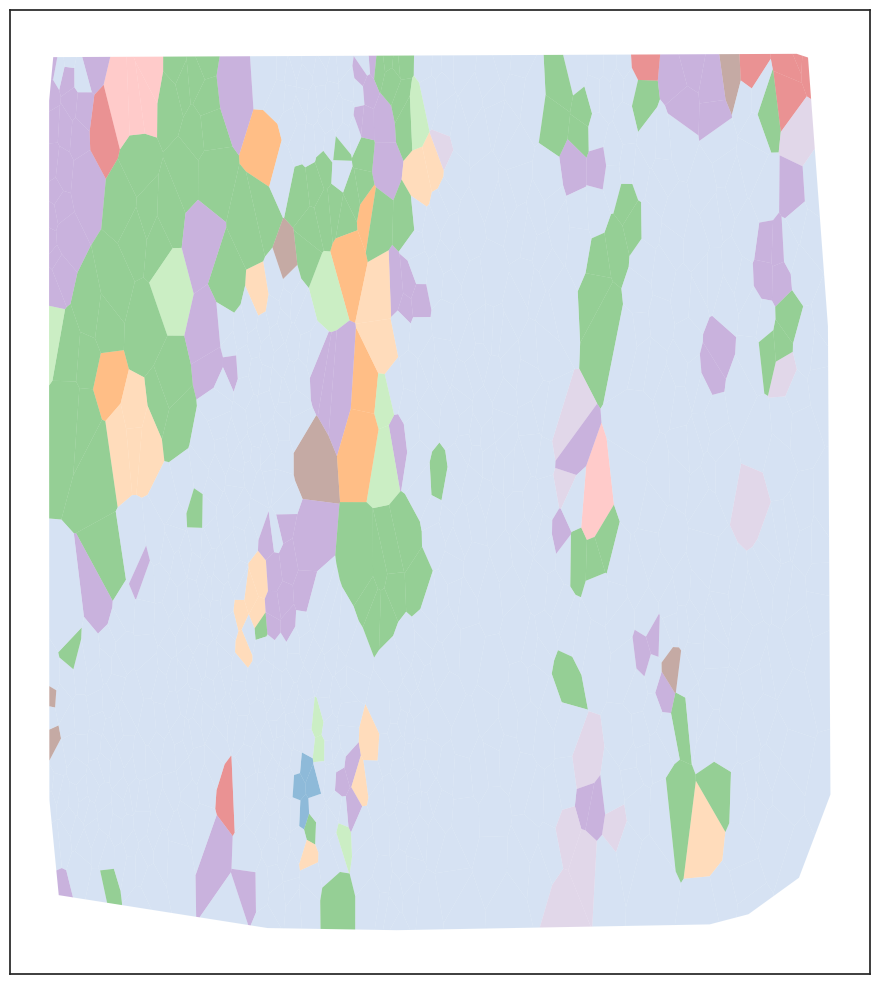

In [26]:
r = "MCD4_reg4"
test = adata[adata.obs['region']==r,:].copy()
test = test[1:1000,]
fig, ax = plt.subplots(figsize=(10,10))
sm.pl.voronoi(test, x_coordinate='Absolute.X', y_coordinate='Absolute.Y', 
              color_by = 'motif', imageid='orig.ident',voronoi_edge_color='white', voronoi_line_width=0, **{'ax':ax},
             )

/mnt/isilon/cscb/software/anaconda3/envs/scimap/lib/python3.8/site-packages/scimap/plotting/_voronoi.py:228: ImplicitModificationWarning:

Trying to modify attribute `.obs` of view, initializing view as actual.



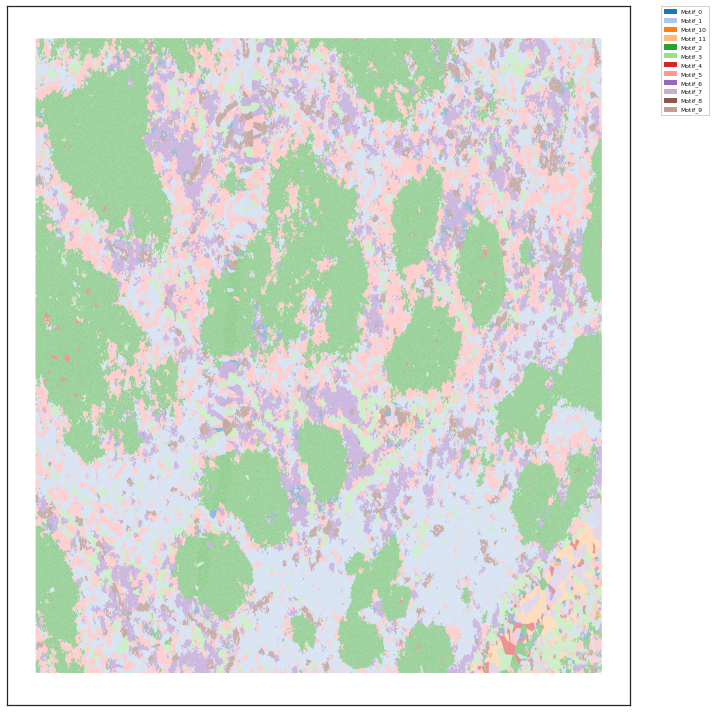

In [5]:
r = "R1_reg1"
fig, ax = plt.subplots(figsize=(10,10))
sm.pl.voronoi(adata[adata.obs['region']==r,:], x_coordinate='Absolute.X', y_coordinate='Absolute.Y', 
              color_by = 'motif', imageid='orig.ident',voronoi_edge_color='white', voronoi_line_width=0, **{'ax':ax})
plt.savefig("outs/LDA_voronoi_test/R1r1_50um_12motif.png", dpi=300)

## I like the 12 region LDA

In [3]:
motif_anno = pd.read_csv("../motif_annotations.csv", index_col=0)
motif_anno

,desc
motif,
Motif_0,"mantle, unknown"
Motif_1,"interfollicular, CD4 T cell predominant"
Motif_2,B cell follicle
Motif_3,"interfollicular, macrophage, T cell"
Motif_4,"follicle, FDC-B cell area"
Motif_5,"interfollicular, macrophage, cDC, CD4"
Motif_6,pDC predominant
Motif_7,endothelial
Motif_8,"endothelial, MCD1 predominant, spotty?"


In [4]:
adata.obs['motif_name'] = adata.obs['motif'].apply(lambda x: motif_anno.loc[x,"desc"])
adata.obs['motif_name'].value_counts()

B cell follicle                            878663
interfollicular, CD4 T cell predominant    709459
plasma cell                                492448
pDC predominant                            431912
interfollicular, macrophage, T cell        319844
interfollicular, macrophage, cDC, CD4      316396
endothelial, perifollicular                240589
endothelial                                215301
endothelial, MCD1 predominant, spotty?     141860
mantle, unknown                             80915
follicle, FDC-B cell area                   45345
stromal, unknown, follicle                  22382
Name: motif_name, dtype: int64

In [5]:
def make_motif_images(adata, region, outpath, motif_colors):
    if os.path.isfile(os.path.join(out_path, 'voronoi_combined', region + '.pdf')): # something stalled out
        return None
    fig, ax = plt.subplots(figsize=(15,15))
    sm.pl.voronoi(adata[adata.obs['region']==region,:], x_coordinate='Absolute.X', y_coordinate='Absolute.Y', colors=motif_colors,
              color_by = 'motif_name', imageid='orig.ident',voronoi_edge_color='white', voronoi_line_width=0, **{'ax':ax})
    plt.savefig(os.path.join(out_path, 'voronoi_combined', region + '.pdf'), dpi=300)
    plt.close()
    return None

In [6]:
out_path = "/mnt/isilon/cscb/Projects/codex/pillaiv/SCTC-VP-15/code/CD_analysis/outs"
motif_colors = dict(zip(adata.obs['motif_name'].unique(), sns.color_palette("hls",adata.obs['motif_name'].nunique())))
res = Parallel(4)(delayed(make_motif_images)(adata, r, out_path, motif_colors) for r in adata.obs['region'].unique())

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [14]:
for c in adata.obs['case'].unique():
    d = c[:-1]
    c_adata = adata[adata.obs['case'] == c, :].copy()
    c_adata = sm.tl.spatial_distance(c_adata, x_coordinate='Absolute.X', y_coordinate='Absolute.Y', 
                               phenotype='motif', imageid='region')
    sm.pl.spatial_distance(c_adata, phenotype='motif', heatmap_standard_scale=1)
    plt.savefig(os.path.join(out_path, d, c + 'motif_dist_heatmap.pdf'))
    plt.close()
    c_adata = sm.tl.spatial_interaction(c_adata, x_coordinate='Absolute.X', y_coordinate='Absolute.Y', 
                               phenotype='motif', imageid='region',
                              method='radius', radius=50)
    sm.pl.spatial_interaction(c_adata)
    plt.savefig(os.path.join(out_path, d, c + 'motif_intxn_heatmap.pdf'))
    plt.close()

    # cell type abundance bar plot
    abun_dat = c_adata.obs.motif.value_counts()
    abun_dat.plot.bar()
    plt.savefig(os.path.join(out_path, d, c + 'motif_abundance.png'), bbox_inches="tight")
    plt.close()

    # making pie chart
    keep = abun_dat > 0.01*c_adata.shape[0]
    pie_dat = abun_dat[keep]
    pie_dat['rare_cells'] = abun_dat[~keep].sum()
    plt.pie(pie_dat, labels=pie_dat.index)
    plt.savefig(os.path.join(out_path, d, c + 'motif_abundance_pie_graph.png'), bbox_inches="tight")
    plt.close()

Processing Image: MCD1_reg1
Processing Image: MCD1_reg3
Processing Image: MCD1_reg4
Processing Image: MCD1_reg2
Processing Image: ['MCD1_reg1']
Categories (1, object): ['MCD1_reg1']
Identifying neighbours within 50 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['MCD1_reg3']
Categories (1, object): ['MCD1_reg3']
Identifying neighbours within 50 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['MCD1_reg4']
Categories (1, object): ['MCD1_reg4']
Identifying neighbours within 50 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
Processing Image: ['MCD1_reg2']
Categories (1, object): ['MCD1_reg2']
Identifying neighbours within 50 pixels of every cell
Mapping phenotype to neighbors
Performing 1000 permutations
Consolidating the permutation results
